In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle
# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('..\\datos_1\\df_final.csv', index_col=0)
df.head()

,price,size_stand,distance_stand,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
0,750.0,0.011443,-0.714088,699.996805,701.603662,704.776468,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,750.0,0.432212,-0.040932,699.996805,678.759957,693.455133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,590.0,0.432212,2.948728,699.996805,675.974382,693.455133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,684.0,-0.619710,-0.446614,685.802390,675.974382,680.560184,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,600.0,0.558443,1.505006,699.996805,701.603662,693.455133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
x= df.drop(columns='price')
y = df[['price']]

In [4]:
y.describe()

,price
count,341.000000
mean,697.316716
std,53.823617
min,500.000000
25%,670.000000
50%,710.000000
75%,749.000000
max,750.000000


In [5]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [7]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [8]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[729.88849937],
       [697.72115926],
       [729.4900811 ]])

In [9]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[666.65614758],
       [671.35786722],
       [721.38803401]])

In [10]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [11]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.322316,32.644736,1863.100182,43.163644
test,0.321055,37.569515,2300.831953,47.966988


Text(0, 0.5, 'Predicciones (y_test_pred)')

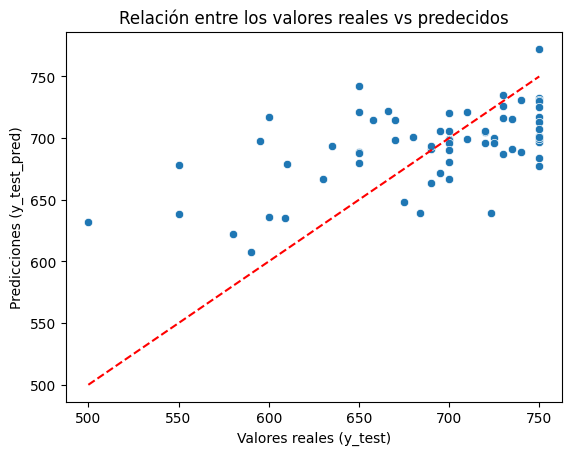

In [12]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

# Cross Validation

## Decision Tree

In [13]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [14]:
params_arbol_4 = {
    'max_depth': [2,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [6,7, 8]
}

In [15]:
params_arbol_3 = {
    'max_depth': [7,10,14],
    'min_samples_split': [10, 30,40],
    'min_samples_leaf': [7, 10],
    'max_leaf_nodes': [7, 8, 9]
}

In [16]:
params_arbol_2 = {
    'max_depth': [5,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [4,5,6,]
}

In [17]:
params_arbol_5 = {
    'max_depth': [10,30,50],
    'min_samples_split': [100, 200, 500],
    'min_samples_leaf': [50,60,81],
    'max_leaf_nodes': [10,20,50]
}

In [18]:
params_arbol_10 = {
    'max_depth': [2,4,7],
    'min_samples_split': [20,30,10],
    'min_samples_leaf': [21,25,30],
    'max_leaf_nodes': [4,6,9,12]
}

## Params 1

In [19]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 7, 10, 14],
                         'max_leaf_nodes': [6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [20]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [21]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=20, min_samples_leaf=15,
                      min_samples_split=10)

In [22]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [23]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [24]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.333183,32.119164,1833.223850,42.816163
test,0.232907,39.257565,2599.550891,50.985791


# Params 3

In [25]:
grid_search_arbol_3 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_3,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 14], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [7, 10],
                         'min_samples_split': [10, 30, 40]},
             scoring='neg_mean_squared_error')

In [26]:
modelo_final_arbol_3 = grid_search_arbol_3.best_estimator_

In [27]:
y_test_pred_final_3 = modelo_final_arbol_3.predict(x_test)
y_train_pred_final_3 = modelo_final_arbol_3.predict(x_train)

In [28]:
df_metricas_arbol_3 = metricas(y_train, y_train_pred_final_3, y_test, y_test_pred_final_3)

In [29]:
df_metricas_arbol_3

,r2_score,MAE,MSE,RMSE
train,0.328333,33.117070,1846.558067,42.971596
test,0.180915,39.527965,2775.743494,52.685325


## PARAMS 2

In [30]:
grid_search_arbol_2 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_2,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 4, 3], 'max_leaf_nodes': [4, 5, 6],
                         'min_samples_leaf': [18, 20, 21],
                         'min_samples_split': [50, 100, 110]},
             scoring='neg_mean_squared_error')

In [31]:
modelo_final_arbol_2 = grid_search_arbol_2.best_estimator_

In [32]:
modelo_final_arbol_2

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=4, min_samples_leaf=21,
                      min_samples_split=50)

In [33]:
y_test_pred_final_2 = modelo_final_arbol_2.predict(x_test)
y_train_pred_final_2 = modelo_final_arbol_2.predict(x_train)

In [34]:
df_metricas_arbol_2 = metricas(y_train, y_train_pred_final_2, y_test, y_test_pred_final_2)

In [35]:
df_metricas_arbol_2

,r2_score,MAE,MSE,RMSE
train,0.211711,35.953291,2167.178564,46.552965
test,0.201733,37.771998,2705.194914,52.011488


# Params 5

In [36]:
grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_5.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50],
                         'max_leaf_nodes': [10, 20, 50],
                         'min_samples_leaf': [50, 60, 81],
                         'min_samples_split': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [37]:
modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [38]:
modelo_final_arbol_5

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, min_samples_leaf=50,
                      min_samples_split=200)

In [39]:
y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [40]:
df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [41]:
df_metricas_arbol_5

,r2_score,MAE,MSE,RMSE
train,0.068101,40.470255,2561.992582,50.616130
test,0.101788,42.471103,3043.890156,55.171461


# PARAMS 10

In [42]:
grid_search_arbol_10 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_10,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_10.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 7],
                         'max_leaf_nodes': [4, 6, 9, 12],
                         'min_samples_leaf': [21, 25, 30],
                         'min_samples_split': [20, 30, 10]},
             scoring='neg_mean_squared_error')

In [43]:
modelo_final_arbol_10 = grid_search_arbol_10.best_estimator_

In [44]:
modelo_final_arbol_10

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=9, min_samples_leaf=21,
                      min_samples_split=20)

In [45]:
y_test_pred_final_10 = modelo_final_arbol_10.predict(x_test)
y_train_pred_final_10 = modelo_final_arbol_10.predict(x_train)

In [46]:
df_metricas_arbol_10 = metricas(y_train, y_train_pred_final_10, y_test, y_test_pred_final_10)

In [47]:
df_metricas_arbol_10

,r2_score,MAE,MSE,RMSE
train,0.295403,33.480313,1937.090310,44.012388
test,0.242138,39.903789,2568.267925,50.678081


## Opciones de visualización para mejorar

In [48]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol_2.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,0.004011,0.000316,0.003502,0.000895,3,4,21,50,"{'max_depth': 3, 'max_leaf_nodes': 4, 'min_sam...",-2339.991162,-2729.621448,-2635.466020,-2144.880062,-2668.723076,-2503.736354,224.137335,1
6,0.004412,0.000594,0.002905,0.000659,5,4,21,50,"{'max_depth': 5, 'max_leaf_nodes': 4, 'min_sam...",-2339.991162,-2729.621448,-2635.466020,-2144.880062,-2668.723076,-2503.736354,224.137335,1
33,0.003704,0.000681,0.012818,0.016423,4,4,21,50,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",-2339.991162,-2729.621448,-2635.466020,-2144.880062,-2668.723076,-2503.736354,224.137335,1
57,0.005112,0.001885,0.004011,0.000964,3,4,20,50,"{'max_depth': 3, 'max_leaf_nodes': 4, 'min_sam...",-2345.594512,-2729.621448,-2635.466020,-2144.880062,-2677.346726,-2506.581754,224.616803,4
3,0.004069,0.000596,0.003401,0.000488,5,4,20,50,"{'max_depth': 5, 'max_leaf_nodes': 4, 'min_sam...",-2345.594512,-2729.621448,-2635.466020,-2144.880062,-2677.346726,-2506.581754,224.616803,4
30,0.005412,0.000970,0.003796,0.000746,4,4,20,50,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",-2345.594512,-2729.621448,-2635.466020,-2144.880062,-2677.346726,-2506.581754,224.616803,4
0,0.003398,0.000488,0.002821,0.000612,5,4,18,50,"{'max_depth': 5, 'max_leaf_nodes': 4, 'min_sam...",-2345.594512,-2763.531894,-2635.466020,-2144.880062,-2691.322747,-2516.159047,233.687889,7
54,0.009846,0.006146,0.009097,0.010318,3,4,18,50,"{'max_depth': 3, 'max_leaf_nodes': 4, 'min_sam...",-2345.594512,-2763.531894,-2635.466020,-2144.880062,-2691.322747,-2516.159047,233.687889,7
27,0.004906,0.001396,0.002906,0.000493,4,4,18,50,"{'max_depth': 4, 'max_leaf_nodes': 4, 'min_sam...",-2345.594512,-2763.531894,-2635.466020,-2144.880062,-2691.322747,-2516.159047,233.687889,7
52,0.005303,0.001888,0.008839,0.008020,4,6,21,100,"{'max_depth': 4, 'max_leaf_nodes': 6, 'min_sam...",-2408.492540,-2729.621448,-2823.954996,-2144.880062,-2487.751364,-2518.940082,241.044822,10


In [49]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
60,3,4,21,50,-2503.736354
6,5,4,21,50,-2503.736354
33,4,4,21,50,-2503.736354
57,3,4,20,50,-2506.581754
3,5,4,20,50,-2506.581754
...,...,...,...,...,...
42,4,5,21,50,-2592.188421
39,4,5,20,50,-2593.473509
12,5,5,20,50,-2593.473509
9,5,5,18,50,-2604.672316


In [50]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [51]:
df_rmse_prof

,param_max_depth,MSE
0,3,50.508004
1,4,50.462061
2,5,50.462061


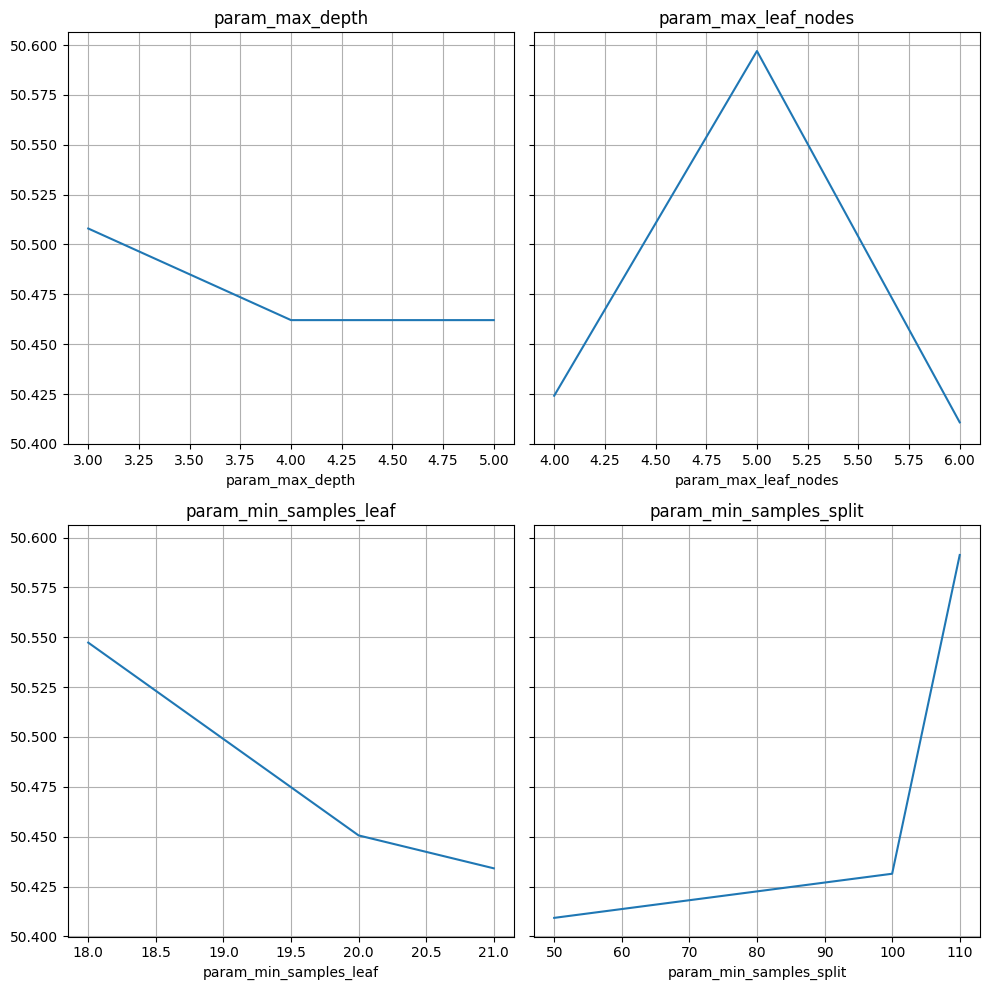

In [52]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [53]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

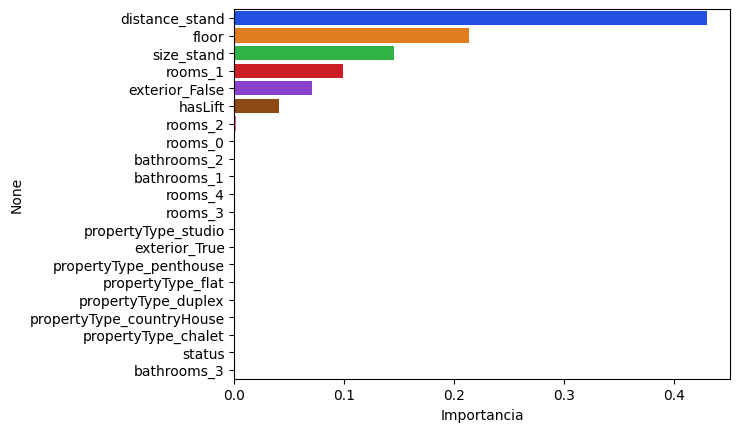

In [54]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

# Random Forest

In [55]:
params_rf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,6,8],
    'max_depth': [10],
    'min_samples_split': [9],
    'min_samples_leaf': [40,60,80,100], 
    # 'max_leaf_nodes': [55]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rf = RandomizedSearchCV(modelo_rf, # solo hace las iteraciones que le digo
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = randonmized_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [56]:
params_rf = {
    'n_estimators': [35,50,75,115,110,120,150],
    'max_features': [3,5,7,10,15,18,20],
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [50,60,65],
    'min_samples_leaf': [19,21], 
    'max_leaf_nodes': [2,4,6]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [57]:
modelo_final_rf

RandomForestRegressor(max_depth=3, max_features=7, max_leaf_nodes=4,
                      min_samples_leaf=21, min_samples_split=50,
                      n_estimators=35, random_state=42)

In [58]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.180438,37.592355,2253.154715,47.467407
test,0.181773,40.789178,2772.834359,52.657709


In [59]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(modelo_final_rf, f)

# Gradient Booster

In [60]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [61]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=20, min_samples_split=100,
                          n_estimators=150, random_state=42)

In [62]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.591190,25.385647,1123.907953,33.524736
test,0.244321,39.536766,2560.868917,50.605029


# XGB

In [63]:
from xgboost import XGBRegressor

In [64]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [65]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.480133,28.763124,1429.227445,37.805125
test,0.232698,39.143895,2600.259349,50.992738
